In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)
from tensorflow.keras import layers, models

import tensorflow as tf

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Baseline Model with Multi-Layer Perceptrons
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# from keras.utils import np_utils

# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
print(X_train.shape)
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')


(60000, 784)


In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [11]:
from tensorflow.keras.utils import to_categorical

# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


In [16]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # save model
    model.save('baseline.h5')
    return model

In [17]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 3s - 10ms/step - accuracy: 0.9236 - loss: 0.2747 - val_accuracy: 0.9593 - val_loss: 0.1404
Epoch 2/10
300/300 - 1s - 2ms/step - accuracy: 0.9690 - loss: 0.1080 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9788 - loss: 0.0718 - val_accuracy: 0.9763 - val_loss: 0.0774
Epoch 4/10
300/300 - 1s - 2ms/step - accuracy: 0.9857 - loss: 0.0506 - val_accuracy: 0.9778 - val_loss: 0.0704
Epoch 5/10
300/300 - 1s - 2ms/step - accuracy: 0.9895 - loss: 0.0367 - val_accuracy: 0.9811 - val_loss: 0.0628
Epoch 6/10
300/300 - 1s - 2ms/step - accuracy: 0.9920 - loss: 0.0278 - val_accuracy: 0.9829 - val_loss: 0.0600
Epoch 7/10
300/300 - 1s - 2ms/step - accuracy: 0.9951 - loss: 0.0198 - val_accuracy: 0.9810 - val_loss: 0.0623
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9971 - loss: 0.0142 - val_accuracy: 0.9817 - val_loss: 0.0609
Epoch 9/10
300/300 - 1s - 2ms/step - accuracy: 0.9977 - loss: 0.0107 - val_accuracy: 0.9834 - val_loss: 0.0577


# Training and Evaluation


In [15]:
# Predict the output
Y_pred = model.predict(X_test)

# Evaluate the model with both test data and labels
score = model.evaluate(X_test, y_test, verbose=0)  # Set verbose=0 to suppress detailed output
print('Test loss:', score[0])
print('Test accuracy:', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test loss: 0.0648413598537445
Test accuracy: 0.9811000227928162


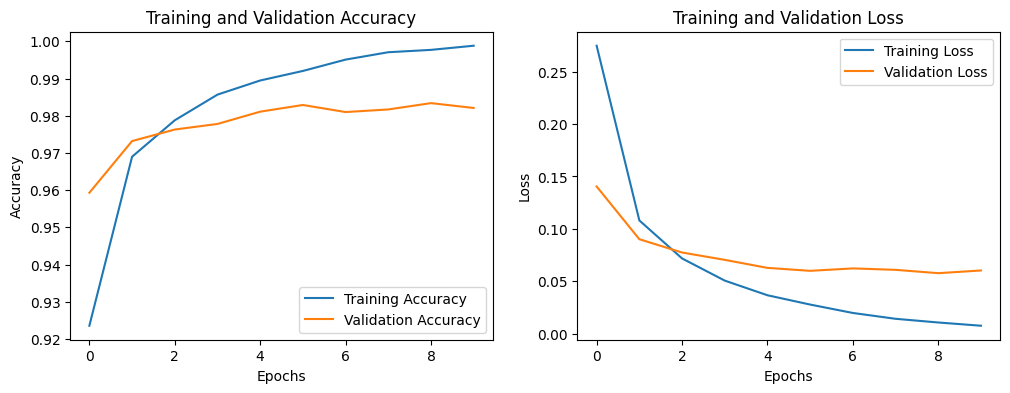

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = np.unique(y_train)

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

In [21]:
import numpy as np

# Check unique labels in training and test sets
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [0. 1.]
Unique labels in y_test: [0. 1.]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of classes: 10
Class Names: ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.98      0.99      0.98      1032
     Class 3       0.98      0.98      0.98      1010
     Class 4       0.99      0.97      0.98       982
     Class 5       0.99      0.98      0.98       892
     Class 6       0.98      0.99      0.99       958
     Class 7       0.98      0.97      0.98      1028
     Class 8       0.98      0.98      0.98       974
     Class 9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Precision: 0.98, Recall: 0.98,

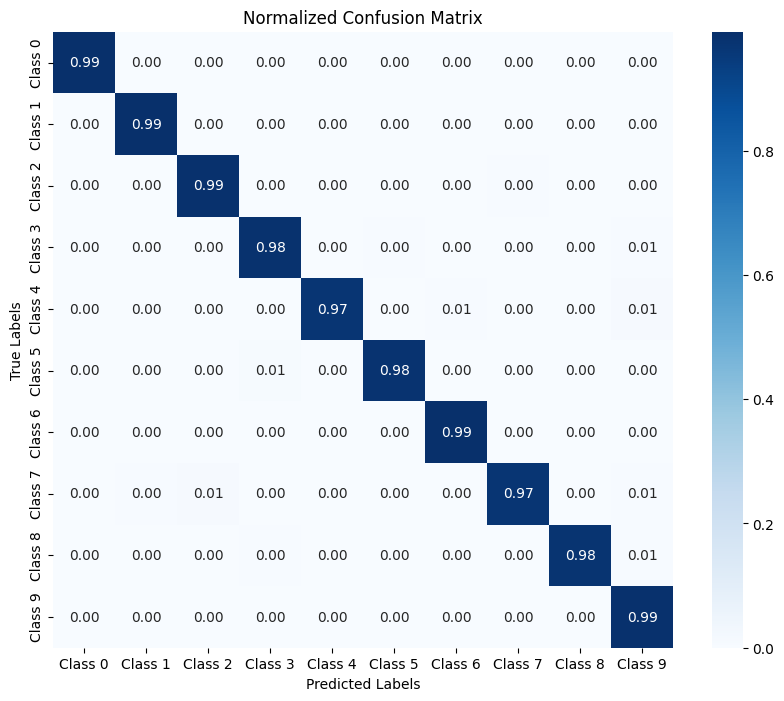

In [28]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Use the original labels for Y_true
Y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Verify number of classes
num_classes = len(np.unique(Y_true))
print(f"Number of classes: {num_classes}")

# Define or verify class names
CLASS_NAMES = [f'Class {i}' for i in range(num_classes)]  # Replace with actual names if available
print(f"Class Names: {CLASS_NAMES}")

# Generate a classification report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=CLASS_NAMES))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [27]:
print(f"Number of predicted classes: {len(set(Y_pred_classes))}")
print(f"Number of true classes: {len(set(Y_true))}")
print(f"Number of class names: {len(CLASS_NAMES)}")


Number of predicted classes: 10
Number of true classes: 10
Number of class names: 2


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


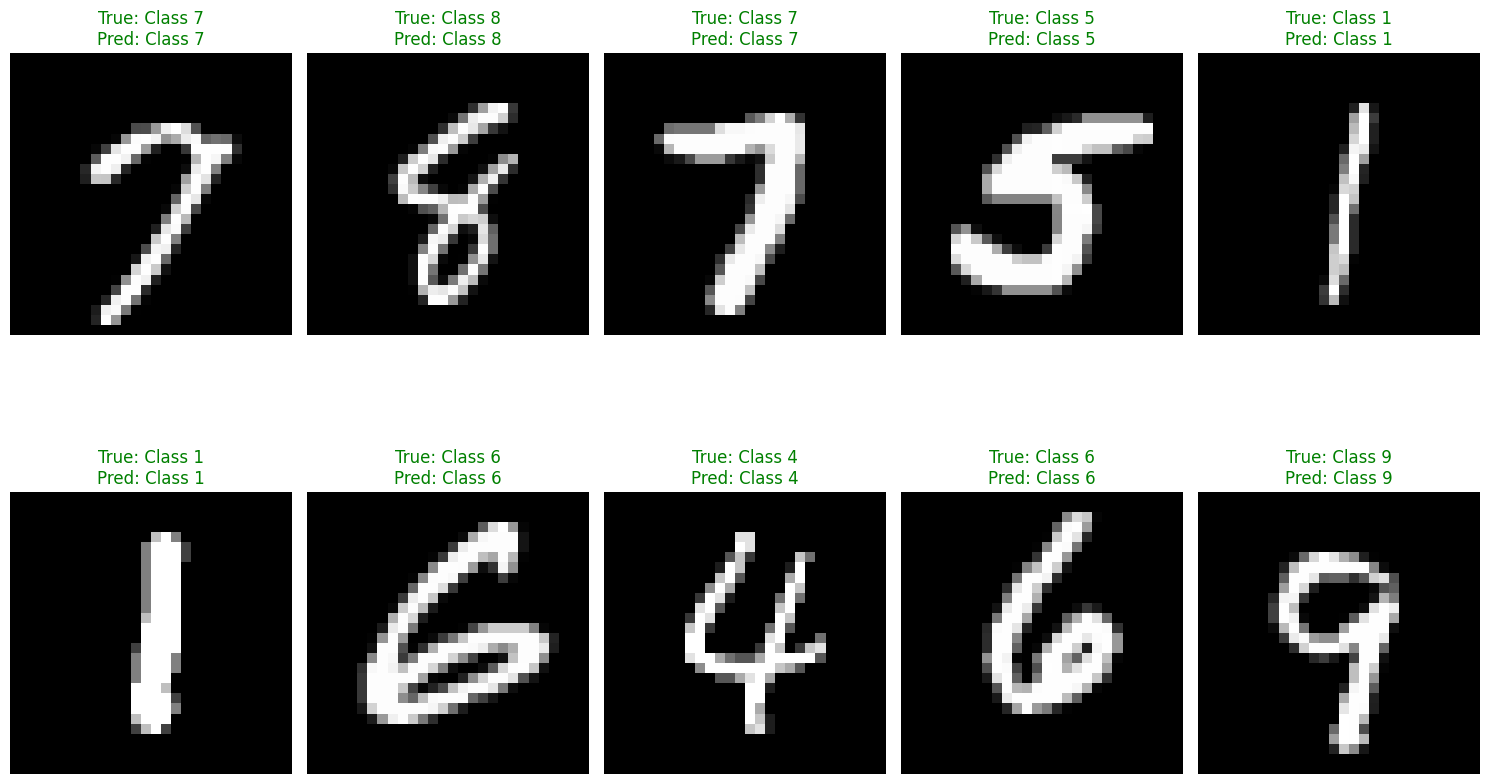

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape X_test if necessary (e.g., for MNIST dataset with 28x28 grayscale images)
image_height = 28  # Replace with actual height
image_width = 28   # Replace with actual width
num_channels = 1   # Set to 1 for grayscale or 3 for RGB

X_test_images = X_test.reshape(-1, image_height, image_width, num_channels)

# Predict on test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)  # Actual labels

# Select 10 random indices
random_indices = np.random.choice(range(len(X_test)), size=10, replace=False)

# Plot 10 images with their predictions and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    if num_channels == 1:  # Grayscale images
        plt.imshow(X_test_images[idx].squeeze(), cmap='gray')
    else:  # RGB images
        plt.imshow(X_test_images[idx])
    plt.title(f"True: {CLASS_NAMES[Y_true[idx]]}\nPred: {CLASS_NAMES[Y_pred_classes[idx]]}",
              color="green" if Y_true[idx] == Y_pred_classes[idx] else "red")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Model 2 Implementation

In [34]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
                                        path=r'C:\Users\KIIT\Desktop\Pianalytix\Code\datasets\mnist.npz')

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [35]:
def CNN_model():
	# create model
    model2 = Sequential()
    model2.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Dropout(0.2))
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu'))
    model2.add(Dense(num_classes, activation='softmax'))

    # Compile
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Scaving the model
    model2.save('models/CNN-model.h5')
    return model2

In [36]:
# build the model
model = CNN_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.9269 - loss: 0.2561 - val_accuracy: 0.9762 - val_loss: 0.0849
Epoch 2/10
300/300 - 1s - 3ms/step - accuracy: 0.9772 - loss: 0.0764 - val_accuracy: 0.9816 - val_loss: 0.0562
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9833 - loss: 0.0543 - val_accuracy: 0.9852 - val_loss: 0.0458
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9878 - val_loss: 0.0374
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 6/10
300/300 - 1s - 3ms/step - accuracy: 0.9912 - loss: 0.0286 - val_accuracy: 0.9884 - val_loss: 0.0354
Epoch 7/10
300/300 - 1s - 3ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9889 - val_loss: 0.0338
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9935 - loss: 0.0203 - val_accuracy: 0.9873 - val_loss: 0.0392
Epoch 9/10
300/300 - 1s - 5ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9893 - val_loss: 0.0316


# Training and Evaluation

In [37]:
# Predict the output
Y_pred = model.predict(X_test)

# Evaluate the model with both test data and labels
score = model.evaluate(X_test, y_test, verbose=0)  # Set verbose=0 to suppress detailed output
print('Test loss:', score[0])
print('Test accuracy:', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test loss: 0.029695477336645126
Test accuracy: 0.9905999898910522


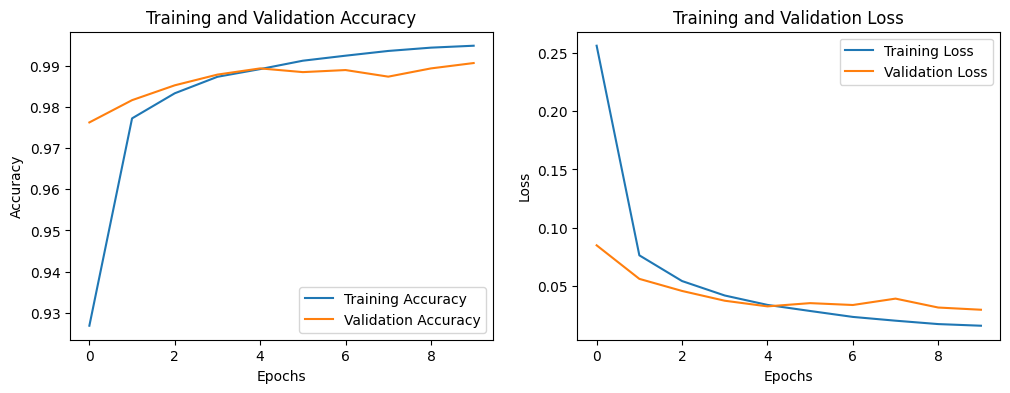

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = np.unique(y_train)

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

In [39]:
import numpy as np

# Check unique labels in training and test sets
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [0. 1.]
Unique labels in y_test: [0. 1.]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of classes: 10
Class Names: ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       0.99      0.98      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.98      0.99       974
     Class 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Precision: 0.99, Recall: 0.99,

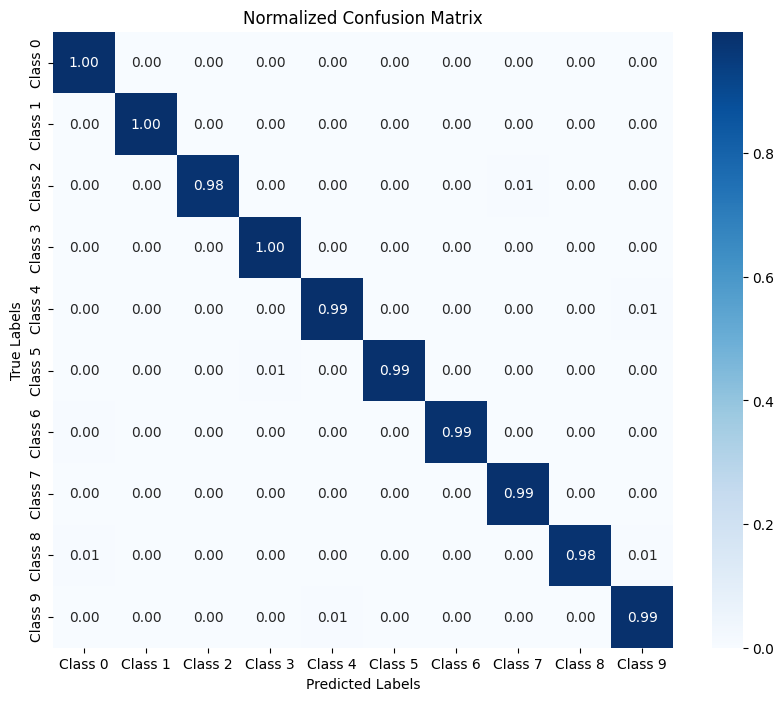

In [40]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Use the original labels for Y_true
Y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Verify number of classes
num_classes = len(np.unique(Y_true))
print(f"Number of classes: {num_classes}")

# Define or verify class names
CLASS_NAMES = [f'Class {i}' for i in range(num_classes)]  # Replace with actual names if available
print(f"Class Names: {CLASS_NAMES}")

# Generate a classification report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=CLASS_NAMES))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [41]:
print(f"Number of predicted classes: {len(set(Y_pred_classes))}")
print(f"Number of true classes: {len(set(Y_true))}")
print(f"Number of class names: {len(CLASS_NAMES)}")


Number of predicted classes: 10
Number of true classes: 10
Number of class names: 10


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


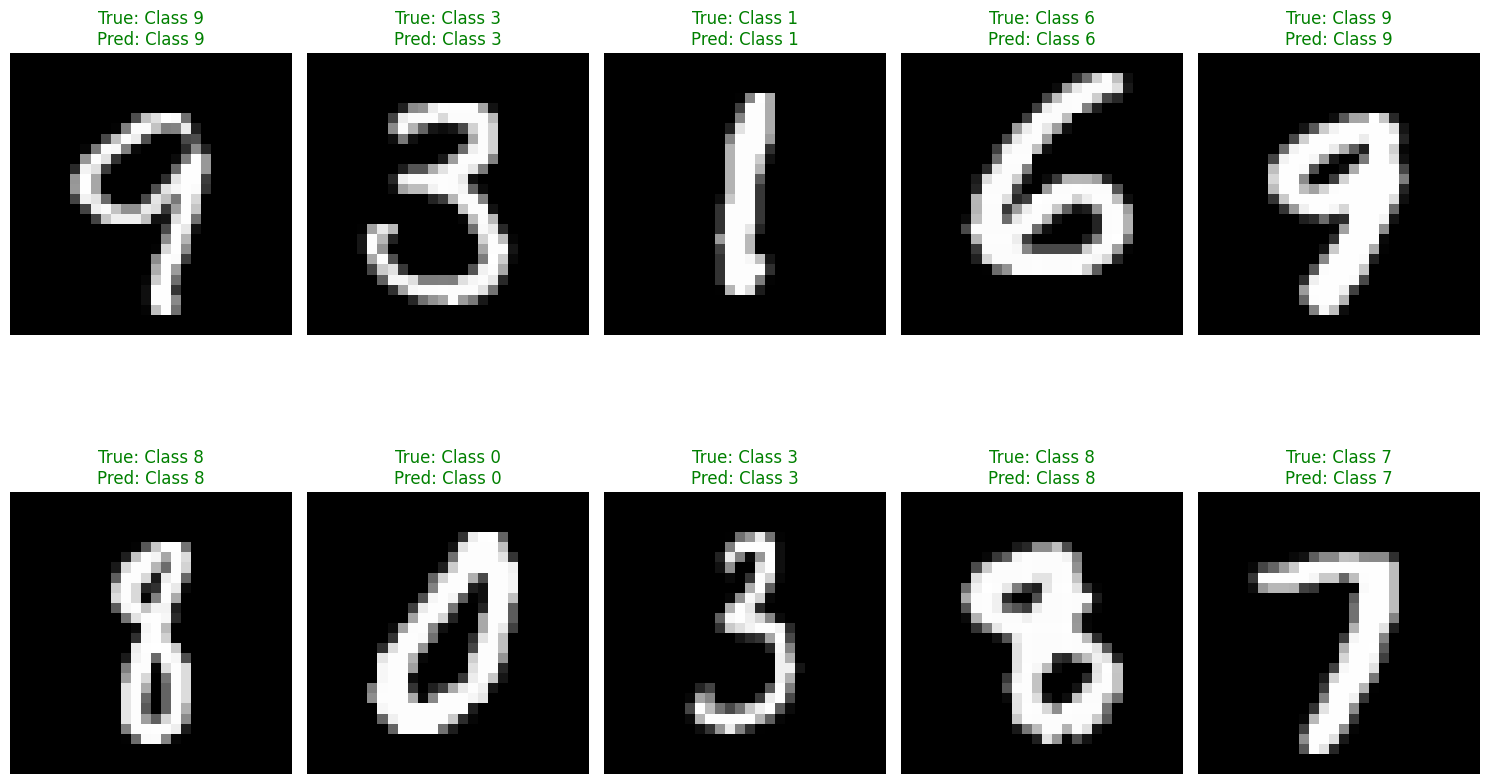

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape X_test if necessary (e.g., for MNIST dataset with 28x28 grayscale images)
image_height = 28  # Replace with actual height
image_width = 28   # Replace with actual width
num_channels = 1   # Set to 1 for grayscale or 3 for RGB

X_test_images = X_test.reshape(-1, image_height, image_width, num_channels)

# Predict on test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)  # Actual labels

# Select 10 random indices
random_indices = np.random.choice(range(len(X_test)), size=10, replace=False)

# Plot 10 images with their predictions and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    if num_channels == 1:  # Grayscale images
        plt.imshow(X_test_images[idx].squeeze(), cmap='gray')
    else:  # RGB images
        plt.imshow(X_test_images[idx])
    plt.title(f"True: {CLASS_NAMES[Y_true[idx]]}\nPred: {CLASS_NAMES[Y_pred_classes[idx]]}",
              color="green" if Y_true[idx] == Y_pred_classes[idx] else "red")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [44]:
model.save("CNN_MODEL.keras")

# Gradio Implementation

In [45]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [47]:
model

<Sequential name=sequential_3, built=True>

In [51]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the pre-trained model (ensure your model is saved in a file, e.g., 'your_model.h5')
model = model  # Assuming the model is already loaded

# Define class names
CLASS_NAMES = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

# Function to prepare image for prediction
def prepare_image(img):
    img = img.resize((28, 28))  # Resize to match the model input size (e.g., 28x28)
    img = img_to_array(img)  # Convert image to numpy array
    img = img.astype('float32') / 255.0  # Normalize the image
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input (batch_size, height, width, channels)
    return img

# Function to make predictions
def predict_image(uploaded_image):
    # Prepare the image
    img = prepare_image(uploaded_image)

    # Predict the class
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = CLASS_NAMES[predicted_class[0]]

    # Return the prediction label and probability
    prediction_prob = prediction[0][predicted_class[0]]
    return predicted_label, prediction_prob

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(image_mode='L'),  # Accept grayscale images (no resizing here)
    outputs=[gr.Textbox(label="Predicted Class"), gr.Textbox(label="Prediction Probability")],
    live=True,
    title="Image Classifier",
    description="Upload an image, and I will predict its class and show the probability."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3204bfc21dfe95c1f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
